#1).....Extracting feature with EfficientNetB7 ......

In [1]:
!unzip /content/tree.zip

Archive:  /content/tree.zip
  inflating: tree/2367idea99litchi_root_rot.jpg  
  inflating: tree/akasia (1).jfif    
  inflating: tree/akasia (1).jpg     
  inflating: tree/akasia (10).jfif   
  inflating: tree/akasia (2).jfif    
  inflating: tree/akasia (2).jpg     
  inflating: tree/akasia (3).jfif    
  inflating: tree/akasia (4).jfif    
  inflating: tree/akasia (5).jfif    
  inflating: tree/akasia (6).jfif    
  inflating: tree/akasia (7).jfif    
  inflating: tree/akasia (8).jfif    
  inflating: tree/akasia (9).jfif    
  inflating: tree/aonla (1).jfif     
  inflating: tree/aonla (2).jfif     
  inflating: tree/aonla (3).jfif     
  inflating: tree/aonla (4).jfif     
  inflating: tree/aonla (5).jfif     
  inflating: tree/aonla (6).jfif     
  inflating: tree/aonla (7).jfif     
  inflating: tree/aonla (8).jfif     
  inflating: tree/BetalNuts (1).jpg  
  inflating: tree/BetalNuts (10).jpg  
  inflating: tree/BetalNuts (11).jpg  
  inflating: tree/BetalNuts (12).jpg  
  infla

In [144]:
from os import listdir
from pickle import dump
from keras.applications.efficientnet import EfficientNetB7
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.efficientnet import preprocess_input
from keras.models import Model

# extract features from each photo in the directory
def extract_features(directory):
	# load the model

	model = EfficientNetB7()

 
	# re-structure the model
	model.layers.pop()
	model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
	# summarize
	print(model.summary())
	# extract features from each photo
	features = dict()
	for name in listdir(directory):
		# load an image from file
		filename = directory + '/' + name
		image = load_img(filename, target_size=(224, 224))
		# convert the image pixels to a numpy array
		image = img_to_array(image)
		# reshape data for the model
		image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
		# prepare the image for the VGG model
		image = preprocess_input(image)
		# get features
		feature = model.predict(image, verbose=0)
		# get image id
		image_id = name.split('.')[0]
		# store feature
		features[image_id] = feature
		print('>%s' % name)
	return features

# extract features from all images
directory = 'tree'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
# save to file
dump(features, open('tree_features.pkl', 'wb'))

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_10[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

# 2).....Import The Pkl File,Check features..........

In [147]:
import pickle
pickle_in = open("tree_features.pkl","rb")
features = pickle.load(pickle_in)

In [148]:
len(features)

714

In [149]:
features['BetalNuts (1)'][0,10:100]

array([3.89829665e-01, 3.70511621e-01, 5.50933540e-01, 0.00000000e+00,
       4.65976566e-01, 9.11774278e-01, 7.34169111e-02, 4.57426272e-02,
       3.03909838e-01, 2.26007864e-01, 9.58070576e-01, 5.03058312e-04,
       2.21217021e-01, 0.00000000e+00, 0.00000000e+00, 2.57772189e-02,
       0.00000000e+00, 4.91053522e-01, 3.06515217e-01, 0.00000000e+00,
       5.46113372e-01, 2.09730417e-01, 0.00000000e+00, 1.10314563e-01,
       3.32472146e-01, 2.34165087e-01, 1.89179659e-01, 1.38082150e-02,
       1.67269379e-01, 1.18070595e-01, 2.90633738e-01, 6.80478871e-01,
       8.07090759e-01, 6.79648101e-01, 3.15156579e-01, 1.57312036e-01,
       6.17342070e-03, 2.26381108e-01, 8.89417350e-01, 1.72635540e-01,
       2.29988813e-01, 6.25185311e-01, 0.00000000e+00, 2.41246969e-01,
       1.07485914e+00, 0.00000000e+00, 1.12947077e-01, 3.23927790e-01,
       4.46090162e-01, 1.66388992e-02, 9.40046906e-02, 1.33953646e-01,
       2.36701155e+00, 0.00000000e+00, 1.82511508e-01, 1.95916608e-01,
      

In [150]:
features

{'2367idea99litchi_root_rot': array([[0.26069802, 0.02082931, 0.06564048, ..., 0.        , 0.06061028,
         0.16231583]], dtype=float32),
 'BetalNuts (1)': array([[0.08575334, 0.15423857, 0.        , ..., 0.03194789, 0.        ,
         0.44705772]], dtype=float32),
 'BetalNuts (10)': array([[0.07093685, 0.36245757, 0.26352274, ..., 0.02361111, 0.6572199 ,
         0.        ]], dtype=float32),
 'BetalNuts (11)': array([[0.        , 0.        , 0.        , ..., 0.00341911, 0.14426203,
         0.        ]], dtype=float32),
 'BetalNuts (12)': array([[0.0241865 , 0.05171943, 0.0994978 , ..., 0.        , 0.0216937 ,
         0.00254934]], dtype=float32),
 'BetalNuts (13)': array([[0.        , 0.        , 0.        , ..., 0.08978671, 0.18298976,
         0.        ]], dtype=float32),
 'BetalNuts (14)': array([[0.06806869, 0.65660506, 0.09327088, ..., 0.1428255 , 0.        ,
         0.        ]], dtype=float32),
 'BetalNuts (15)': array([[0.0000000e+00, 1.2100737e+00, 9.5009938e-02, .

In [151]:
label = {}

# 3)......... Class Create for Tree Classification.....

In [152]:
def get_class(ipt):
    class_id = 0
    if 'BetalNuts' in ipt : 
        class_id = 1
    elif 'GoldenApple' in ipt : 
        class_id = 2
    elif 'Guava' in ipt : 
        class_id = 3
    elif   'KalaKoroi' in ipt : 
        class_id = 4
    elif   'RajKoroi' in ipt : 
        class_id = 5
    elif 'akasia' in ipt : 
        class_id = 6
    elif  'aonla' in ipt : 
        class_id = 7
    elif  'bh' in ipt : 
        class_id = 8
    elif  'ca' in ipt : 
        class_id = 9
    elif  'cocunat' in ipt : 
        class_id = 10
    elif  'aonla' in ipt : 
        class_id = 11
    elif  'cowa' in ipt : 
        class_id = 12
    elif  'elepapple' in ipt : 
        class_id = 13
    elif  'indolive' in ipt : 
        class_id = 14
    elif  'jackfruit' in ipt : 
        class_id = 15
    elif  'karanja' in ipt : 
        class_id = 16
    elif  'lictree' in ipt : 
        class_id = 17
    elif  'mango' in ipt : 
        class_id = 18
    elif  'mehogoni' in ipt : 
        class_id = 19
    elif  'mojatree' in ipt : 
        class_id = 20
    elif  'neem' in ipt : 
        class_id = 21
    elif  'payara' in ipt : 
        class_id = 22
    elif  'plplam' in ipt : 
        class_id = 23
    elif  'pummelo' in ipt : 
        class_id = 24
    elif  'rantree' in ipt : 
        class_id = 25
    elif  'riverevony' in ipt : 
        class_id = 26
    elif  'sepota' in ipt : 
        class_id = 27
    elif  'shemul' in ipt : 
        class_id = 28
    elif  'sonalu' in ipt : 
        class_id = 29
    elif  'tamarind' in ipt : 
        class_id = 30
    elif  'velapple' in ipt : 
        class_id = 31
    elif  'wa' in ipt : 
        class_id = 32
    else :
     print("I don't know")

    return class_id

In [153]:
for key, value in features.items() :
    label[key] = get_class(key)

I don't know
I don't know
I don't know
I don't know


In [154]:
get_class('wa (4)')

32

In [155]:
label['mojatree (5)']

20

# 4).....Create Numpy Array, Train Test Splite......

In [156]:
x = []
y = []

In [157]:
for key, value in features.items() :
    x.append(features[key][0])
    y.append(label[key])

In [158]:
import numpy as np
x=np.array(x)
y=np.array(y)

In [159]:
x[1].shape

(2048,)

In [160]:
print (type(x))
print (type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [161]:
import numpy as np
x_train_data=np.array(x)
y_train_data=np.array(y)

In [162]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=800, shuffle=True)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=800, shuffle=True)

#5)...Check Train Test Accuracy With svm

In [163]:
from sklearn import svm
#clf = svm.SVC(kernel='linear', C = 10.0, gamma=0.1)
#clf = svm.SVC()
#clf = svm.SVC(kernel='poly', degree=8)
#clf = svm.SVC(kernel='poly')
clf = svm.SVC(kernel='rbf')
#clf = svm.SVC(kernel='sigmoid')

#clf= svm.SVC(kernel='linear') 
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy: {}%".format(clf.score(x_test, y_test) * 100 ))

Accuracy: 52.77777777777778%


#6)Clasiification report (precision, recall,f1-score)

In [164]:
from sklearn.metrics import classification_report, confusion_matrix
#class_names = get_class
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.83      0.56      0.67         9
           2       1.00      0.33      0.50         6
           3       0.17      1.00      0.29         1
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          13       0.25      0.50      0.33         2
          14       0.20      0.40      0.27         5
          15       0.33      1.00      0.50         2
          17       0.75      1.00      0.86         3
          18       0.00      0.00      0.00         0
          19       1.00      1.00      1.00         1
          20       1.00      0.29      0.44         7
          21       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

#7)Confusion matrix

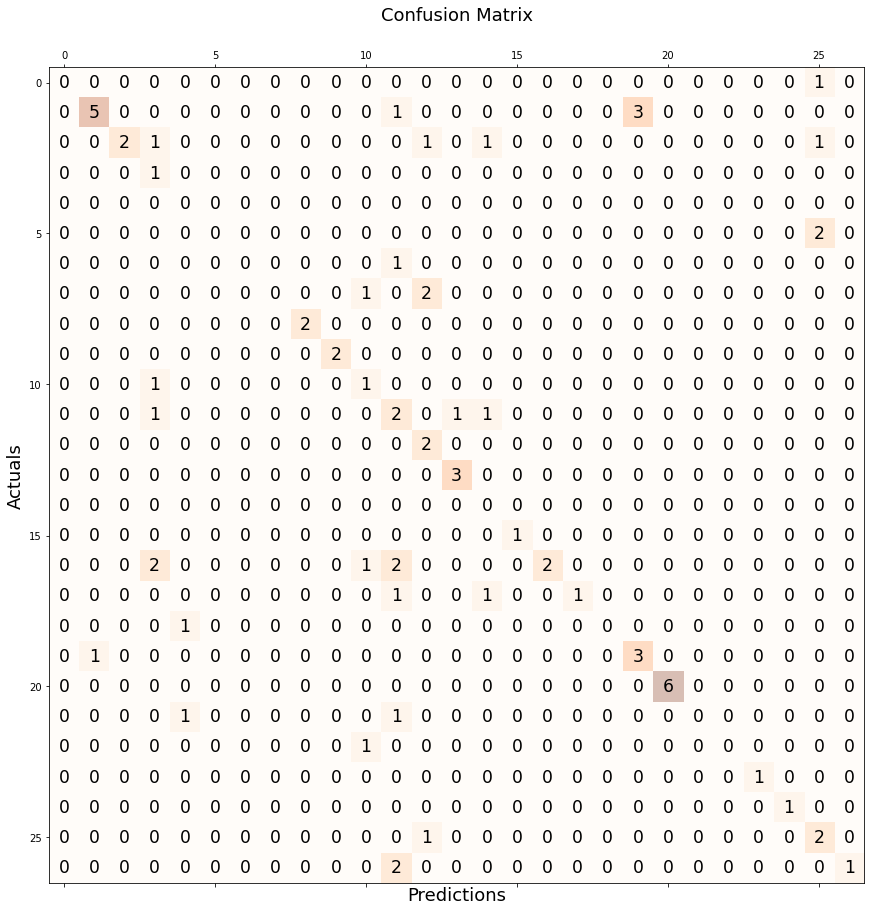

In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(15, 15))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#8)...Check Train Test Accuracy With Random Forest

In [166]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=40)

clf.fit(x_train,y_train)
y_predict = clf.predict(x_test)
print("Accuracy: {}%".format(clf.score(x_test, y_test) * 100 ))

Accuracy: 38.88888888888889%


#5)...Check Train Test Accuracy With SVM,Roc Curve, PRC

In [167]:
#train accuracy for Svm
from sklearn import svm
clf = svm.SVC(kernel='rbf', C = 10.0, gamma=0.1)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_train)
print("Accuracy: {}%".format(clf.score(x_train, y_train) * 100 ))

Accuracy: 100.0%


In [168]:
#test Accuracy for Svm
from sklearn import svm
clf = svm.SVC(kernel='rbf', C = 10.0, gamma=0.1)

#clf = svm.SVC(kernel='poly')

clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print("Accuracy: {}%".format(clf.score(x_test, y_test) * 100 ))

Accuracy: 4.166666666666666%


In [169]:
!pip install scikit-plot

ValueError: ignored

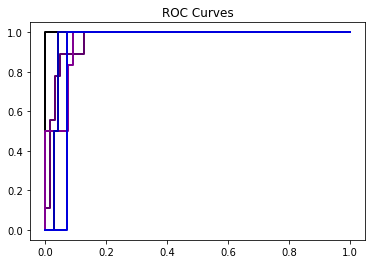

In [170]:
# roc Curve For Svm
import scikitplot as plt
from sklearn import svm
clf = svm.SVC(probability=True)
clf = clf.fit(x_train, y_train)
y_probas = clf.predict_proba(x_test)
plt.metrics.plot_roc(y_test, y_probas, title='ROC Curves', plot_micro=True, plot_macro=True, classes_to_plot=[0,1,2,4,5,6], ax=None, figsize=None, cmap='nipy_spectral', title_fontsize='large', text_fontsize='medium')
plt

In [ ]:
#Precision-Recall Curve for svm
import scikitplot as skplt
clf = svm.SVC(probability=True)
clf = clf.fit(x_train, y_train)
y_probas = clf.predict_proba(x_test)
skplt.metrics.plot_precision_recall(y_test, y_probas, title='Precision-Recall Curve', plot_micro=True, classes_to_plot=[1,2,5,6], ax=None, figsize=None, cmap='nipy_spectral', title_fontsize='large', text_fontsize='medium')

plt

#6)...Check Train Test Accuracy With Logistic Regression,Roc Curve, PRC

In [171]:
#train accuracy for Logistic regression
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train, y_train)
y_predict = clf.predict(x_train)
print("Accuracy: {}%".format(clf.score(x_train, y_train) * 100 ))

Accuracy: 100.0%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [124]:
#test accuracy for Logistic regression
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print("Accuracy: {}%".format(clf.score(x_test, y_test) * 100 ))


Accuracy: 25.0%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


ValueError: ignored

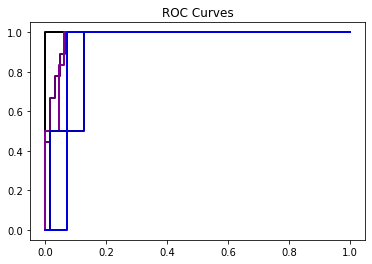

In [172]:
# roc Curve For Logistic Regresion
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
clfrf=LogisticRegression()
clfrf = clfrf.fit(x_train, y_train)
y_probas = clfrf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, title='ROC Curves', plot_micro=True, plot_macro=True, classes_to_plot=[0,1,2,4,5,6], ax=None, figsize=None, cmap='nipy_spectral', title_fontsize='large', text_fontsize='medium')
plt

In [ ]:
import scikitplot as skplt

from sklearn.linear_model import LogisticRegression
clfknnn = LogisticRegression()
clfknnn = clfknnn.fit(x_train, y_train)
y_probas = clfknnn.predict_proba(x_test)
skplt.metrics.plot_precision_recall(y_test, y_probas, title='Precision-Recall Curve', plot_micro=True, 
classes_to_plot=[1,2,5,6], ax=None, figsize=None, cmap='nipy_spectral', title_fontsize='large', text_fontsize='medium')

plt


#7)......For Increase the accuracy K=5 fold cross Validation.....

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4)

kf.get_n_splits(x)
KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [173]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear')
scores = cross_val_score(clf, x, y, cv=5)
scores
print("Accuracy: %0.2f (+/- %0.2f)" % ((scores.mean())*100, scores.std() * 2))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


Accuracy: 61.62 (+/- 0.01)
